In [13]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np 
from keras.metrics import Recall
from keras.metrics import Precision
from sklearn.metrics import fbeta_score
from keras.optimizers import RMSprop
import keras.backend as K
from numpy import array
from tensorflow.keras.utils import *

In [14]:
data = pd.read_csv("Desktop\dataset2020.csv");

In [15]:
mapping = {'pe-legit': 0, 'pe-malicious': 1}
data.iloc[:,0].replace(mapping, inplace=True)

In [16]:
X=data.iloc[:,1:].values
Y=data.iloc[:,0].values

In [29]:
df_x = data.iloc[:,1:].values.reshape(len(data),18,27,1)

y = data.iloc[:,0].values

In [30]:
df_y = keras.utils.to_categorical(y,num_classes=2)

In [31]:
df_x = np.array(df_x)
df_y = np.array(df_y)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.2,random_state=4)

In [33]:
def f1_score(y_true, y_pred, threshold_shift=0):
    beta = 2

    y_pred = K.clip(y_pred, 0, 1)

    y_pred_bin = K.round(y_pred + threshold_shift)

    tp = K.sum(K.round(y_true * y_pred_bin), axis=1) + K.epsilon()
    fp = K.sum(K.round(K.clip(y_pred_bin - y_true, 0, 1)), axis=1)
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)), axis=1)

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    beta_squared = beta ** 2
    return K.mean((beta_squared + 1) * (precision * recall) / (beta_squared * precision + recall + K.epsilon()))

In [63]:
model = Sequential()
model.add(Convolution2D(64,3,activation='relu',input_shape=(18,27,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(128,3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

In [64]:
model.compile(loss='binary_crossentropy', optimizer = RMSprop(lr=0.001), metrics = 
              ['accuracy', f1_score, Precision(name='precision'), Recall(name='recall')
               ])

In [65]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 16, 25, 64)        640       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 12, 64)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 6, 10, 128)        73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 3, 5, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               245888    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

In [66]:
model_fit = model.fit(x_train,y_train,epochs = 10,validation_data=(x_test,y_test))

Train on 39302 samples, validate on 9826 samples
Epoch 1/10
39302/39302 [==============================] - 21s 531us/step - loss: 0.3339 - accuracy: 0.8565 - f1_score: 0.8565 - precision: 0.8565 - recall: 0.8565 - val_loss: 0.2621 - val_accuracy: 0.8948 - val_f1_score: 0.8951 - val_precision: 0.8948 - val_recall: 0.8948
Epoch 2/10
39302/39302 [==============================] - 23s 585us/step - loss: 0.2279 - accuracy: 0.9138 - f1_score: 0.9137 - precision: 0.9138 - recall: 0.9138 - val_loss: 0.2608 - val_accuracy: 0.9120 - val_f1_score: 0.9122 - val_precision: 0.9120 - val_recall: 0.9120
Epoch 3/10
39302/39302 [==============================] - 22s 569us/step - loss: 0.1979 - accuracy: 0.9270 - f1_score: 0.9270 - precision: 0.9270 - recall: 0.9270 - val_loss: 0.2068 - val_accuracy: 0.9296 - val_f1_score: 0.9298 - val_precision: 0.9296 - val_recall: 0.9296
Epoch 4/10
39302/39302 [==============================] - 22s 563us/step - loss: 0.1785 - accuracy: 0.9340 - f1_score: 0.9341 - prec

In [67]:
a = model.evaluate(x_test,y_test)

9826/9826 [==============================] - 1s 123us/step


In [68]:
a

[0.18228840952055544,
 0.9386321902275085,
 0.9388189911842346,
 0.9386321902275085,
 0.9386321902275085]

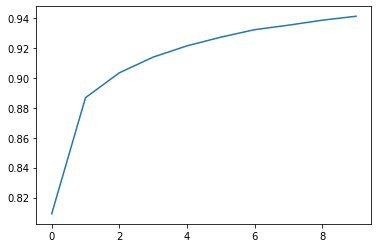

In [83]:
plt.plot(model_fit.history['accuracy'], label='train')

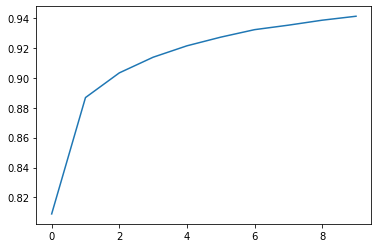

In [84]:
plt.plot(model_fit.history['f1_score'], label='train')

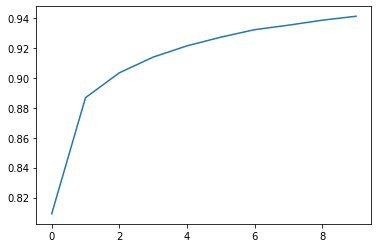

In [85]:
plt.plot(model_fit.history['recall'], label='train')

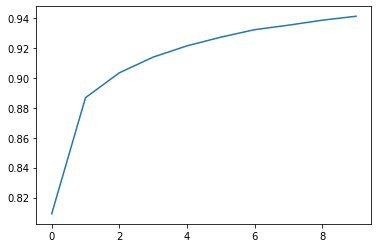

In [86]:
plt.plot(model_fit.history['precision'], label='train')

In [87]:
from sklearn.metrics import confusion_matrix